In [6]:
# start
rm(list=ls())
#setwd('/NGC-DL-CONTAINER-LICENSE')
install.packages("zoo")
install.packages("mFilter")
install.packages("forecast")
library(zoo)
library(mFilter)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [55]:
# 1 - SMA oil
rm(list=ls())
x = read.csv("oil_annual.csv", header = TRUE)
oil <-ts(x$oil, start = c(1980), end =c(2021), frequency = 1)
# Данные в формате TS 

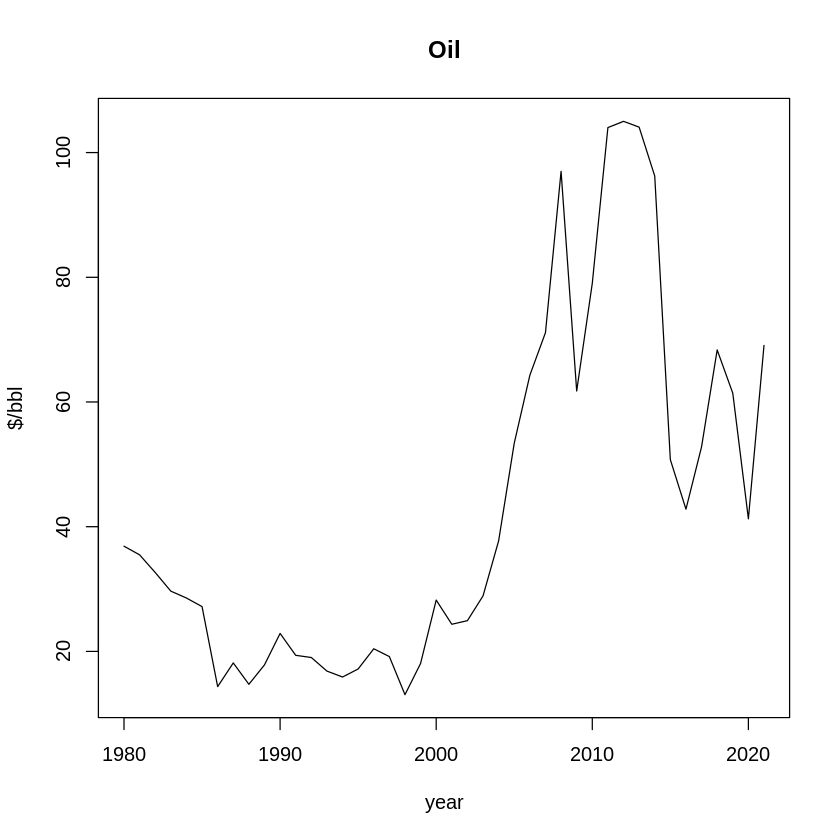

In [13]:
# начальный график
# начальный график
# jpeg("oil.jpg", width = 500, height = 350)
ts.plot(oil, type = "l", main="Oil", xlab = "year", ylab ="$/bbl", lwd = 1)
# dev.off()

In [60]:
sma3 <- (lag(oil,1) + oil + lag(oil,-1))/3
sma5 <- (lag(oil,2) + lag(oil,1) + oil + lag(oil,-1) + lag(oil,-2))/5
sma9 <- (lag(oil,4) + lag(oil,3) + lag(oil,2) + lag(oil,1) + oil +lag(oil,-1) + lag(oil,-2) + lag(oil,-3) + lag(oil,-4))/9


In [61]:
sma3

A Time Series:
 [1]  35.00000  32.59667  30.29000  28.46667  23.36333  19.89333  15.74000
 [8]  16.90333  18.48000  20.03000  20.42333  18.41000  17.25000  16.63667
[15]  17.83000  18.92333  17.55000  16.76667  19.78667  23.55000  25.83667
[22]  26.06000  30.52000  40.00667  51.80333  62.93333  77.46667  76.62333
[29]  79.26333  81.60333  96.02000 104.36667 101.77667  83.69000  63.26667
[36]  48.79000  54.65667  60.85667  57.00667  57.24667

In [67]:
sma <- function(oil, n) {
  sma <- rep(NA, length(oil))
  
  for (i in n:length(oil)) {
    sma[i] <- sum(oil[(i - n + 1):i]) / n
  }
  sma = sma[n:length(oil)]
  return(sma)
}

In [68]:
sma9

A Time Series:
 [1] 26.40222 24.28778 22.88778 21.41222 20.23000 18.92778 17.67333 17.98778
 [9] 18.24000 18.73444 18.20333 17.66889 18.65333 19.24556 20.14444 21.59000
[17] 23.87333 27.53667 32.55000 39.00111 47.77000 51.49556 57.57222 66.35889
[25] 74.81556 82.18778 86.94889 85.44444 82.29889 77.39000 78.12222 76.16333
[33] 69.19111 65.19778

In [69]:
sma(oil,9)

[1] 26.40222 24.28778 22.88778 21.41222 20.23000 18.92778 17.67333 17.98778
 [9] 18.24000 18.73444 18.20333 17.66889 18.65333 19.24556 20.14444 21.59000
[17] 23.87333 27.53667 32.55000 39.00111 47.77000 51.49556 57.57222 66.35889
[25] 74.81556 82.18778 86.94889 85.44444 82.29889 77.39000 78.12222 76.16333
[33] 69.19111 65.19778

In [70]:
sma9 == sma(oil,9)

A Time Series:
 [1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE
[25]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE

In [29]:
dif <- function(oil,n) {
  sman <- sma(oil,n)
  difn <- oil - sman
}

In [25]:
dif3 <- oil-sma3
dif5 <- oil-sma5
dif9 <- oil-sma9

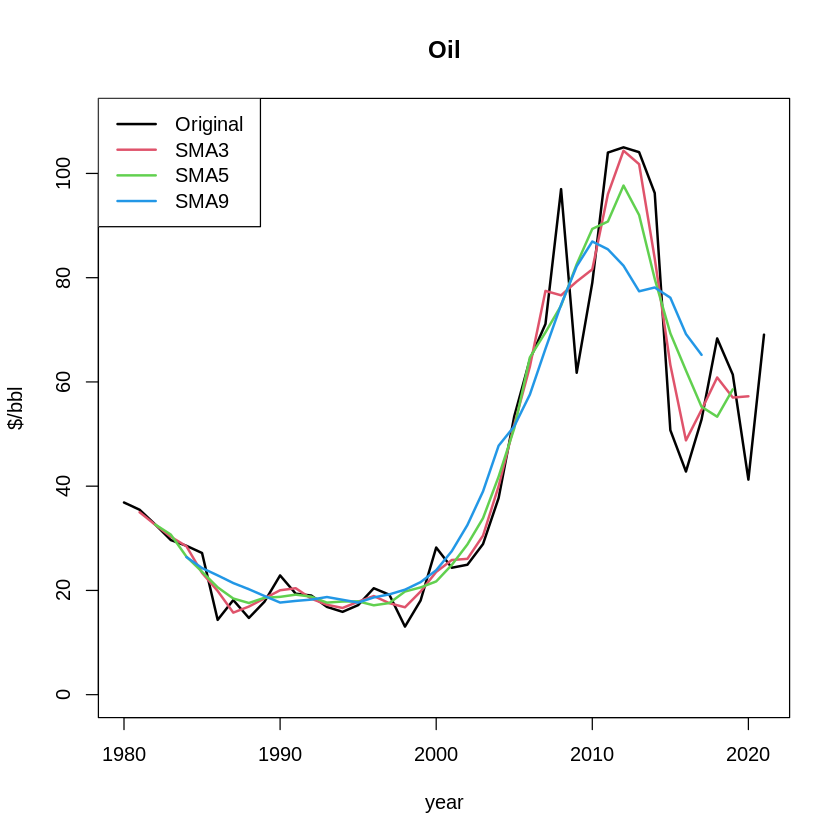

In [26]:
# jpeg("oil_sma.jpg", width = 500, height = 350)
ts.plot(oil, type = "l", main="Oil", ylim=c(0,110), xlab = "year", ylab ="$/bbl", col = 1, lwd = 2)
lines(sma3 ,   col=2, lwd = 2)
lines(sma5 ,   col=3, lwd = 2)
lines(sma9 ,   col=4, lwd = 2)
legend(x = "topleft",   legend = c("Original", "SMA3", "SMA5", "SMA9"),  
       lty = c(1, 1, 1, 1),  
       col = c(1, 2, 3, 4),  
       lwd = 2) 
# dev.off()

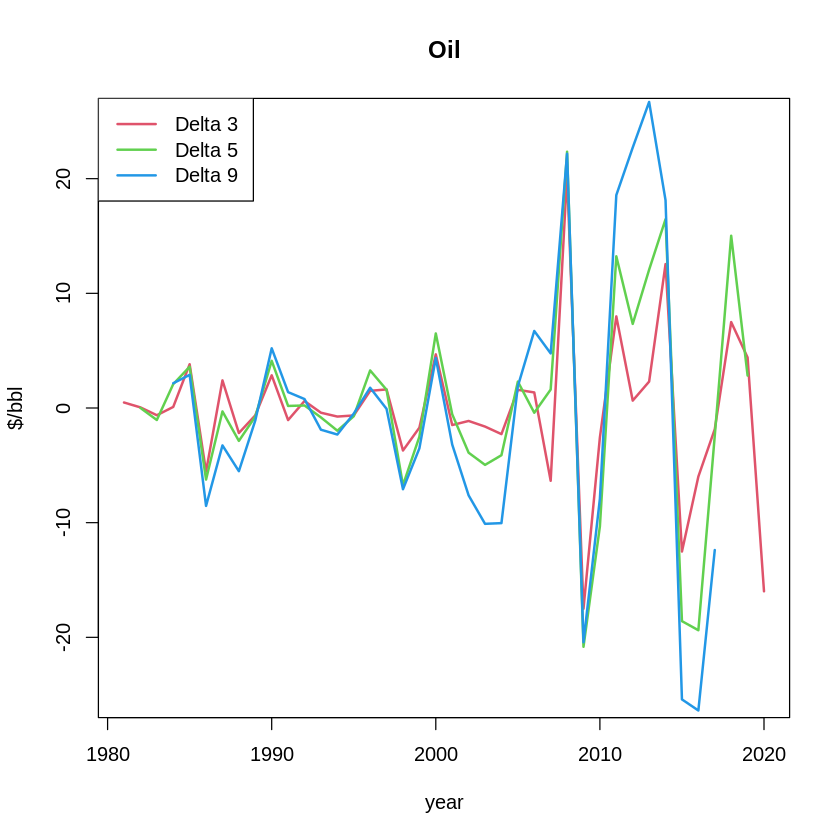

In [27]:
# jpeg("oil_delta.jpg", width = 500, height = 350)
ts.plot(dif3, type = "l", main="Oil", ylim=c(-25,25), xlab = "year", ylab ="$/bbl", col = 2, lwd = 2)
lines(dif5 ,   col=3, lwd = 2)
lines(dif9 ,   col=4, lwd = 2)
legend(x = "topleft",   legend = c("Delta 3", "Delta 5", "Delta 9"),  
       lty = c(1, 1, 1),  
       col = c(2, 3, 4),  
       lwd = 2) 
# dev.off()


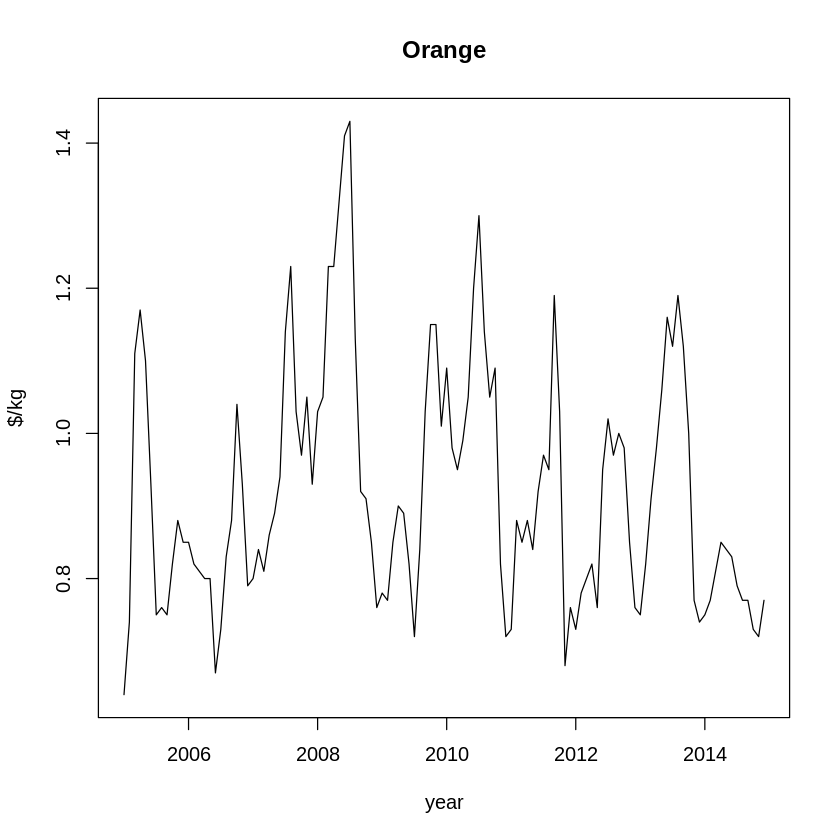

In [32]:
# 2 - SMA Orange

rm(list=ls())
x = read.csv("Orange_monthly.csv", header = TRUE)
Orange <-ts(x$orange, start = c(2005,1), end =c(2014,12), frequency = 12)

# jpeg("orange.jpg", width = 500, height = 350)
ts.plot(Orange, type = "l", main="Orange", xlab = "year", ylab ="$/kg", lwd = 1)
# dev.off()


In [33]:
sma12 <- (0.5*lag(Orange,6) + lag(Orange,5)+lag(Orange,4) + lag(Orange,3)+lag(Orange,2) + 
                  lag(Orange,1) + Orange +lag(Orange,-1)+lag(Orange,-2)+lag(Orange,-3)+lag(Orange,-4)+
                  lag(Orange,-5)+0.5*lag(Orange,-6))/12


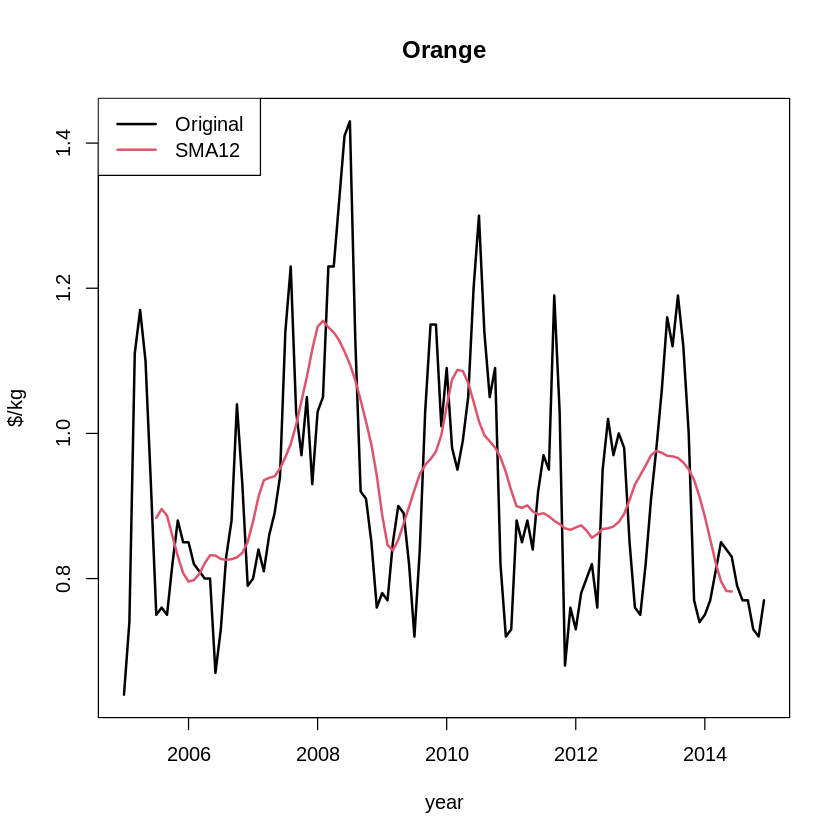

In [34]:
dif12 <- Orange-sma12

# jpeg("orange_sma.jpg", width = 500, height = 350)
ts.plot(Orange, type = "l", main="Orange",  xlab = "year", ylab ="$/kg", col = 1, lwd = 2)
lines(sma12 ,   col=2, lwd = 2)
legend(x = "topleft",   legend = c("Original", "SMA12"),  
       lty = c(1, 1),  
       col = c(1, 2),  
       lwd = 2) 
# dev.off()


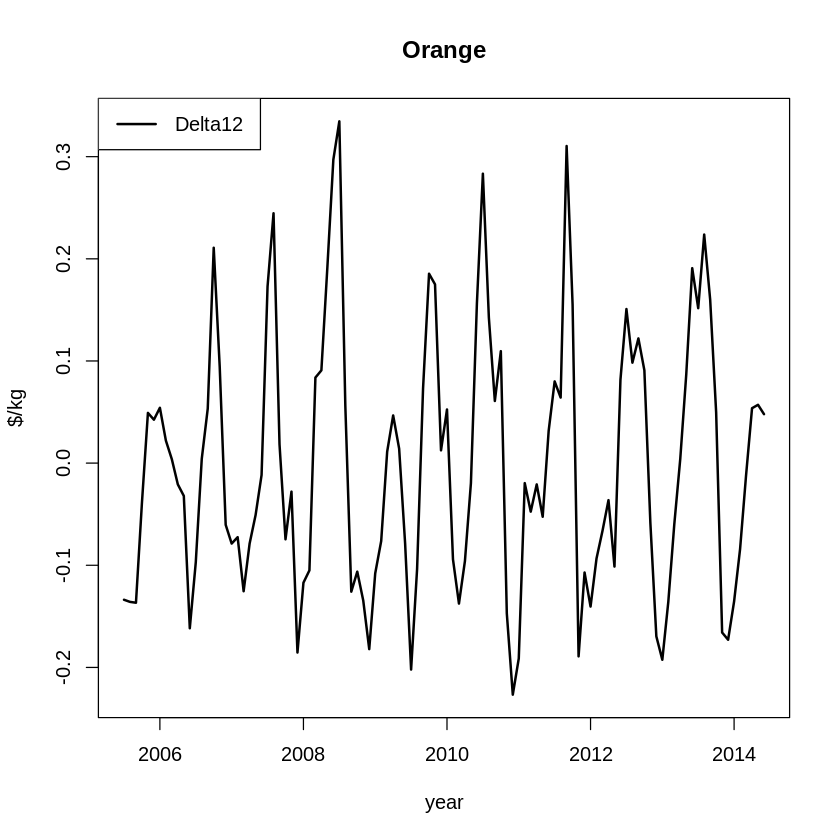

In [35]:
# jpeg("orange_delta.jpg", width = 500, height = 350)
ts.plot(dif12, type = "l", main="Orange",  xlab = "year", ylab ="$/kg", col = 1, lwd = 2)
legend(x = "topleft",   legend = c("Delta12"),  
       lty = c( 1),  
       col = c(1),  
       lwd = 2) 
# dev.off()

In [37]:
sma <- function(x, window) {
  if (window %% 2 == 0) {
    sma_window <- (sum(head(x, -(window/2))) + 
                   sum(tail(x, -(window/2))) + 
                   sum(head(lag(x, -(window/2)), window/2)) + 
                   sum(tail(lag(x, window/2), window/2))) / (window * 2)
  } else {
    sma_window <- (sum(head(x, -((window-1)/2))) + 
                   sum(tail(x, -((window-1)/2))) + 
                   sum(head(lag(x, -((window-1)/2)), (window-1)/2)) + 
                   sum(tail(lag(x, (window-1)/2), (window-1)/2))) / (window * 2)
  }
  return(sma_window)
}

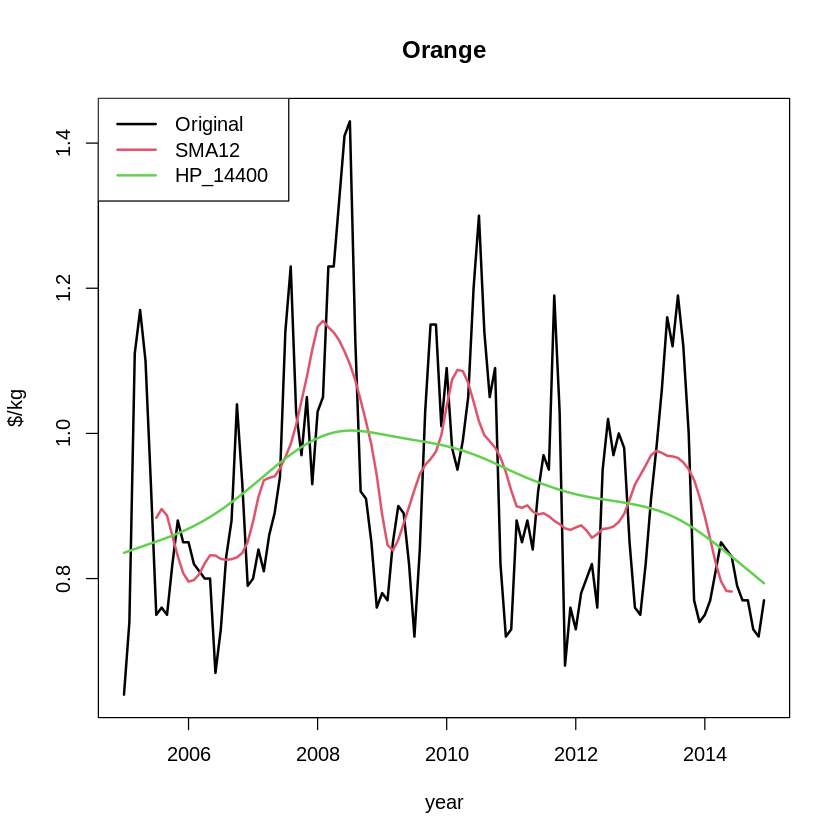

In [36]:
# 3 -HP Filter Orange

hpf14400 <- hpfilter(Orange,freq = 14400)

# jpeg("orange_sma_hp.jpg", width = 500, height = 350)
ts.plot(Orange, type = "l", main="Orange",  xlab = "year", ylab ="$/kg", col = 1, lwd = 2)
lines(sma12 ,   col=2, lwd = 2)
lines(hpf14400$trend ,   col=3, lwd = 2)
legend(x = "topleft",   legend = c("Original", "SMA12", "HP_14400"),  
       lty = c(1, 1, 1),  
       col = c(1, 2, 3),  
       lwd = 2) 
# dev.off()

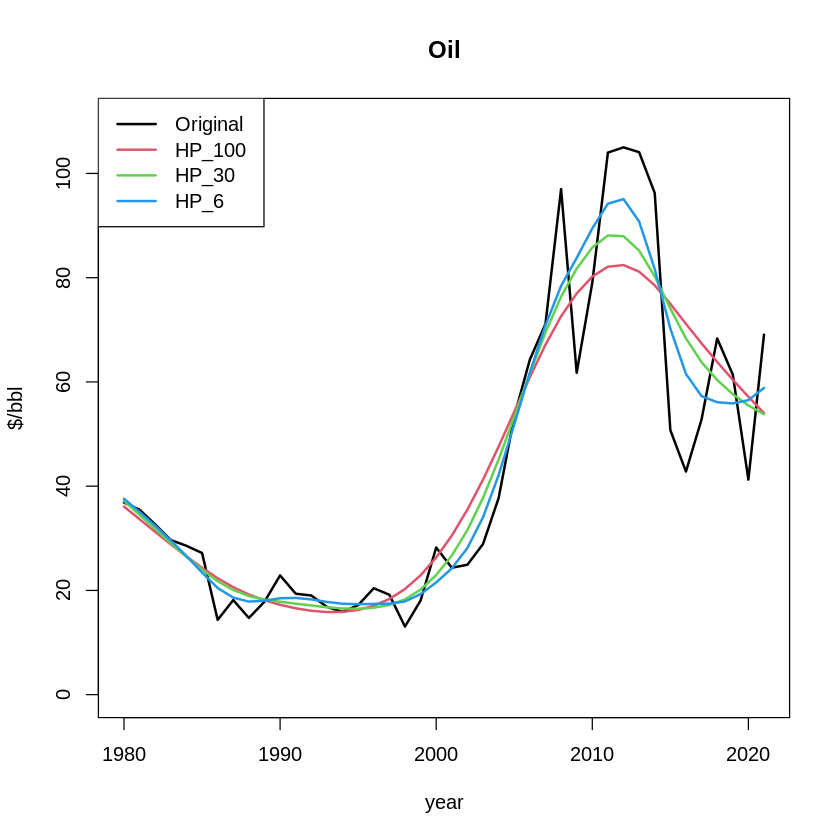

In [41]:
# 4 - HP Filter Oil

rm(list=ls())
x = read.csv("oil_annual.csv", header = TRUE)
oil <-ts(x$oil, start = c(1980), end =c(2021), frequency = 1)

hpf100 <- hpfilter(oil,freq = 100)
hpf30 <- hpfilter(oil,freq = 30)
hpf6 <- hpfilter(oil,freq = 6)

#jpeg("oil_hp.jpg", width = 500, height = 350)
ts.plot(oil, type = "l", main="Oil", ylim=c(0,110), xlab = "year", ylab ="$/bbl", col = 1, lwd = 2)
lines(hpf100$trend ,   col=2, lwd = 2)
lines(hpf30$trend ,   col=3, lwd = 2)
lines(hpf6$trend ,   col=4, lwd = 2)
legend(x = "topleft",   legend = c("Original", "HP_100", "HP_30", "HP_6"),  
       lty = c(1, 1, 1, 1),  
       col = c(1, 2, 3, 4),  
       lwd = 2) 
#dev.off()

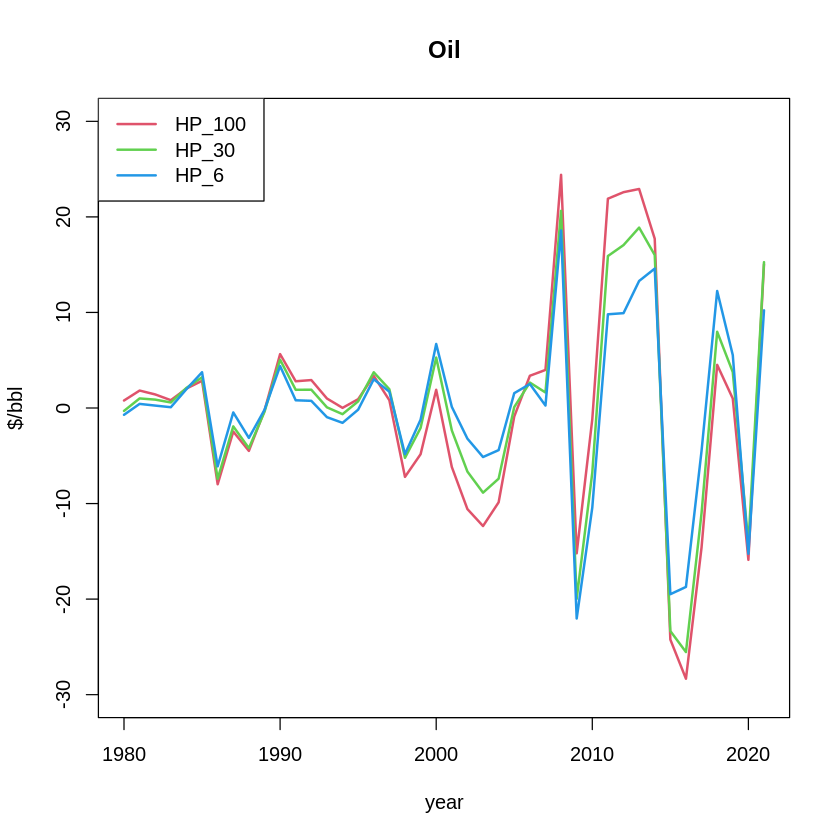

In [42]:
#jpeg("oil_hp_cycle.jpg", width = 500, height = 350)
ts.plot(hpf100$cycle, type = "l", main="Oil", ylim=c(-30,30), xlab = "year", ylab ="$/bbl", col = 2, lwd = 2)
lines(hpf30$cycle ,   col=3, lwd = 2)
lines(hpf6$cycle ,   col=4, lwd = 2)
legend(x = "topleft",   legend = c( "HP_100", "HP_30", "HP_6"),  
       lty = c( 1, 1, 1),  
       col = c(2, 3, 4),  
       lwd = 2) 
#dev.off()

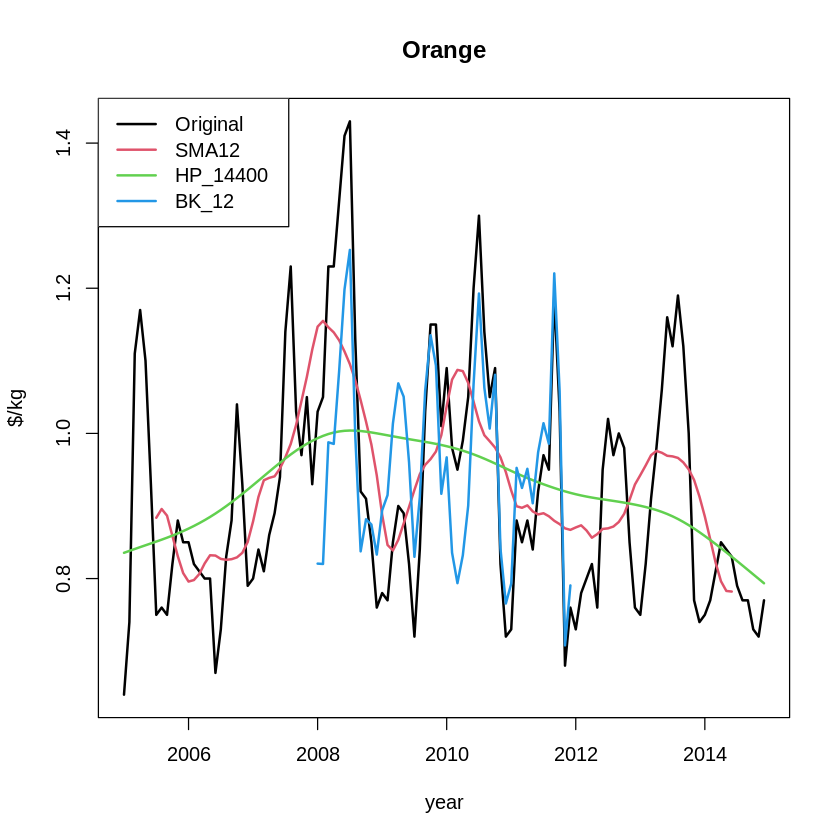

In [49]:
# 5 - BK & HP filters - Orange


rm(list=ls())
x = read.csv("Orange_monthly.csv", header = TRUE)
Orange <-ts(x$orange, start = c(2005,1), end =c(2014,12), frequency = 12)
# nfix - период на котором используем 
# 12 * 8 = 96 
bkf <- bkfilter(Orange, pu=96, pl = 18, nfix = 36)
hpf14400 <- hpfilter(Orange,freq = 14400)

sma12 <- (0.5*lag(Orange,6) + lag(Orange,5)+lag(Orange,4) + lag(Orange,3)+lag(Orange,2) + 
                  lag(Orange,1) + Orange +lag(Orange,-1)+lag(Orange,-2)+lag(Orange,-3)+lag(Orange,-4)+
                  lag(Orange,-5)+0.5*lag(Orange,-6))/12

dif12 <- Orange-sma12


#jpeg("orange_sma_hp_bk.jpg", width = 500, height = 350)
ts.plot(Orange, type = "l", main="Orange",  xlab = "year", ylab ="$/kg", col = 1, lwd = 2)
lines(sma12 ,   col=2, lwd = 2)
lines(hpf14400$trend ,   col=3, lwd = 2)
lines(bkf$trend ,   col=4, lwd = 2)
legend(x = "topleft",   legend = c("Original", "SMA12", "HP_14400", "BK_12"),  
       lty = c(1, 1, 1, 1),  
       col = c(1, 2, 3, 4),  
       lwd = 2) 
#dev.off()

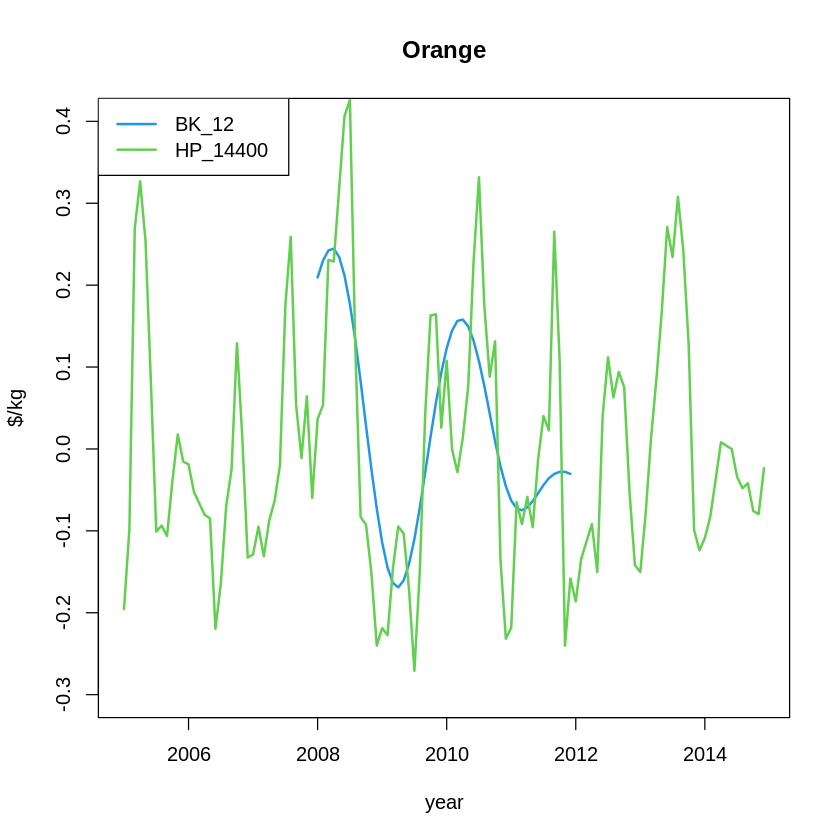

In [50]:
#jpeg("orange_cycle.jpg", width = 500, height = 350)
ts.plot(bkf$cycle, type = "l", main="Orange", ylim = c(-0.3,0.4), xlab = "year", ylab ="$/kg", col = 4, lwd = 2)
lines(hpf14400$cycle ,   col=3, lwd = 2)
legend(x = "topleft",   legend = c("BK_12", "HP_14400"),  
       lty = c( 1, 1),  
       col = c(4, 3),  
       lwd = 2) 
#dev.off()

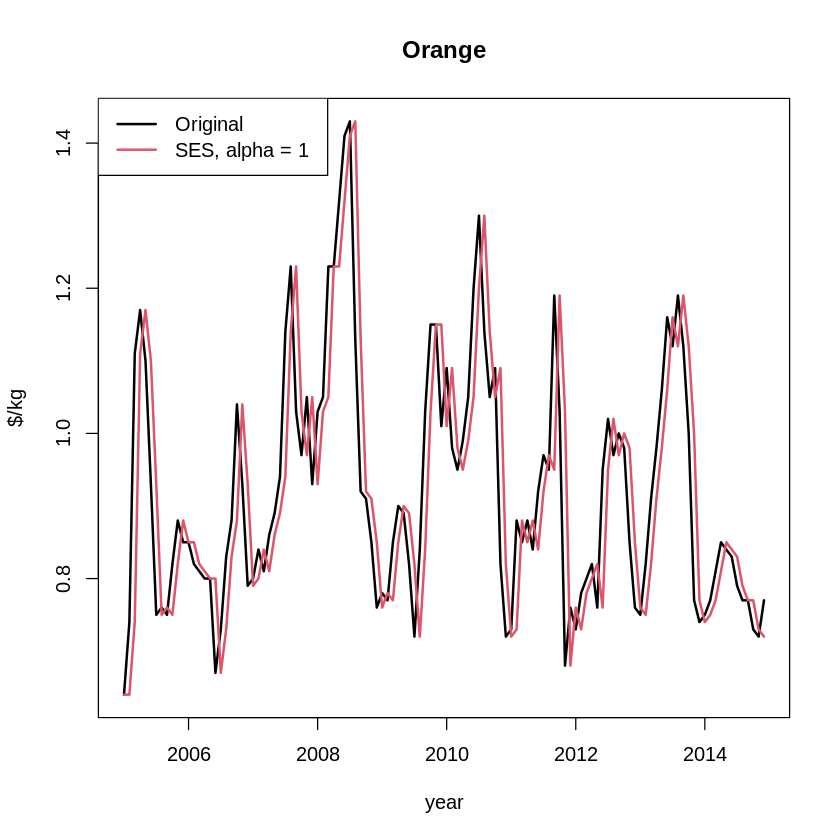

In [52]:
# 6 - SES 

ses1 <-ses(Orange, h=4, alpha=NULL, initial="simple")

# jpeg("orange_ses1.jpg", width = 500, height = 350)
ts.plot(Orange, type = "l", main="Orange",  xlab = "year", ylab ="$/kg", col = 1, lwd = 2)
lines(ses1$fitted ,   col=2, lwd = 2)
legend(x = "topleft",   legend = c("Original", "SES, alpha = 1"),  
       lty = c( 1, 1),  
       col = c(1, 2),  
       lwd = 2) 
# dev.off()

In [80]:
ses1

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
101       1687.891 1645.654 1730.128 1623.295 1752.486
102       1687.891 1629.019 1746.762 1597.855 1777.927

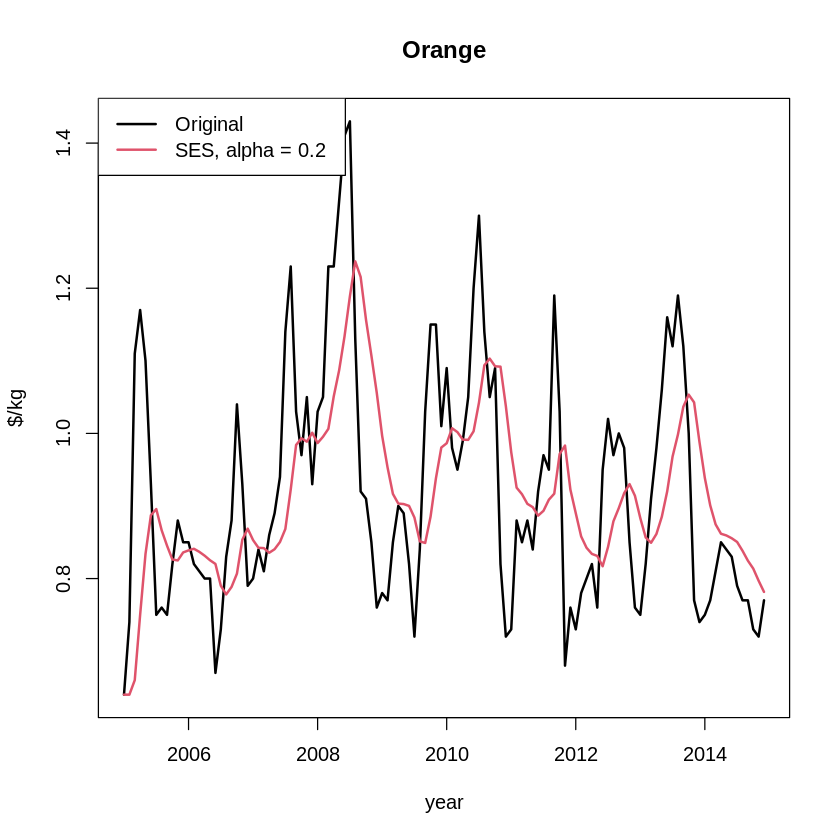

In [53]:
ses02 <-ses(Orange, h=4, alpha=0.2, initial="simple")

# jpeg("orange_ses02.jpg", width = 500, height = 350)
ts.plot(Orange, type = "l", main="Orange",  xlab = "year", ylab ="$/kg", col = 1, lwd = 2)
lines(ses02$fitted ,   col=2, lwd = 2)
legend(x = "topleft",   legend = c("Original", "SES, alpha = 0.2"),  
       lty = c( 1, 1),  
       col = c(1, 2),  
       lwd = 2) 
# dev.off()

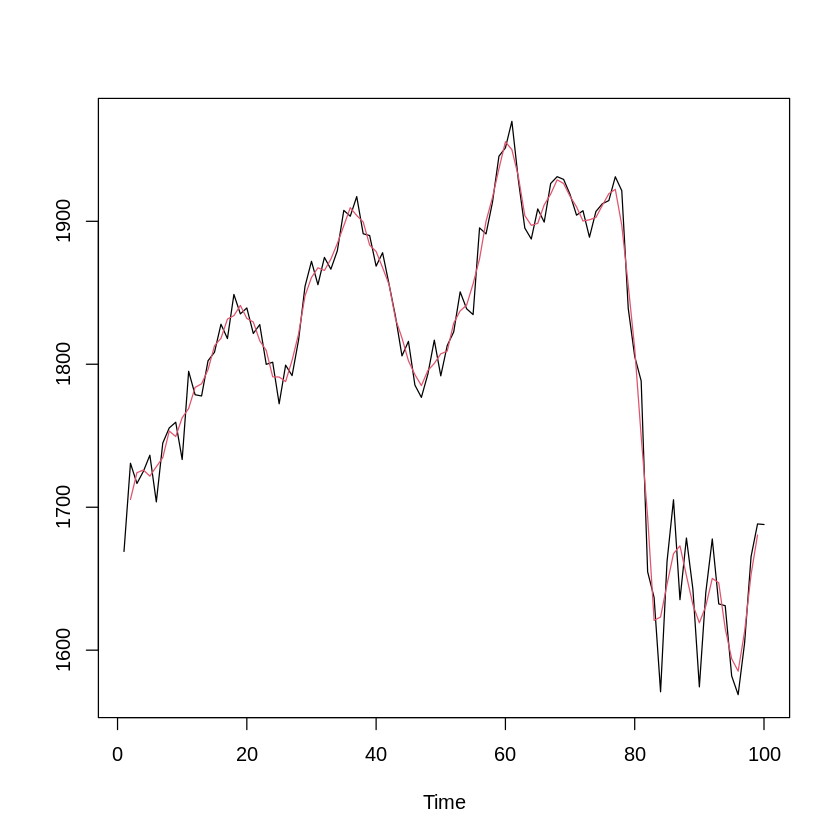

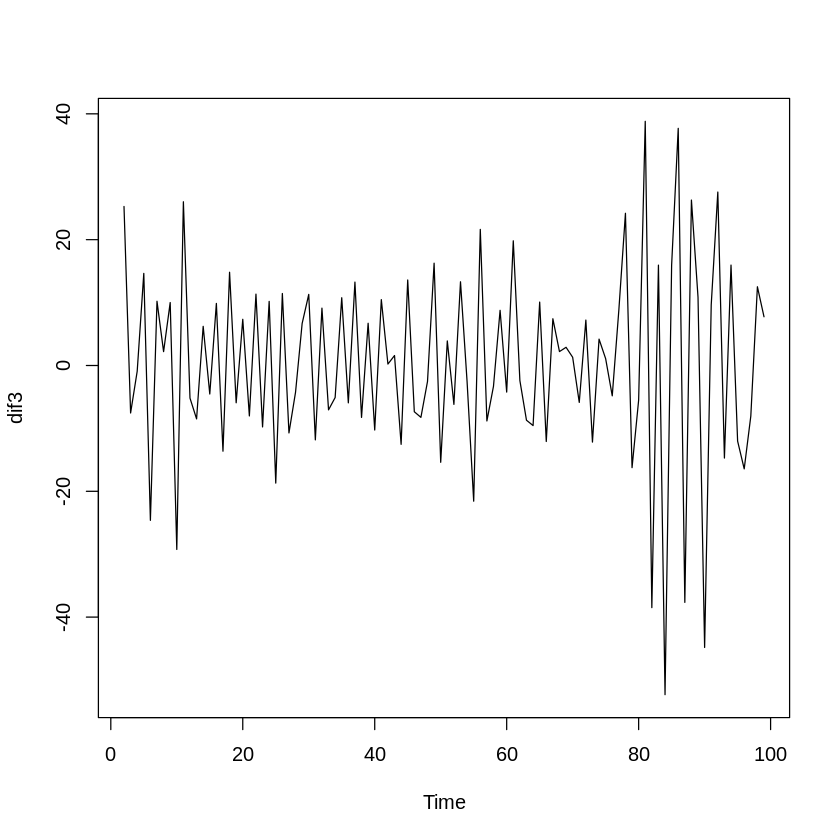

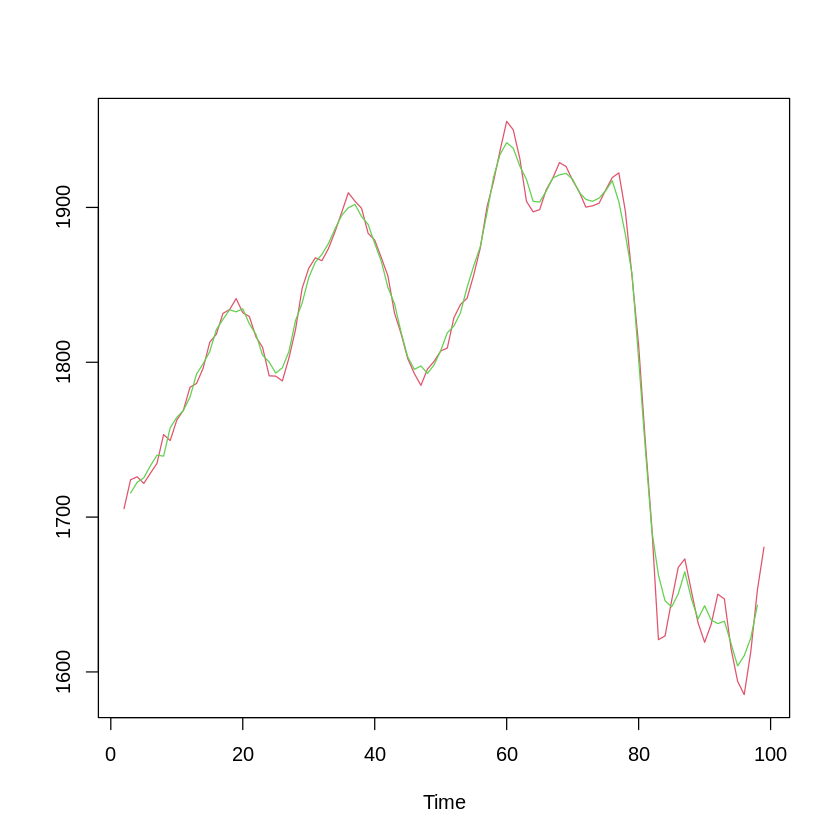

In [71]:
# 7 - пример 5.1.1
rm(list=ls())
x <- ts(read.csv("f01_data_ind.csv", header = TRUE))
sma3 <- (lag(x,1) + x +lag(x,-1))/3
# graphics.off()
ts.plot(x, sma3, col = 1:2, lwd = 1)
dif3 <- x-sma3
ts.plot(dif3, col = 1, lwd = 1)
sma5 <- (lag(x,2) + lag(x,1) + x +lag(x,-1)+lag(x,-2))/5
dif5 <- x-sma5
ts.plot(sma3, sma5, col = 2:3, lwd = 1)


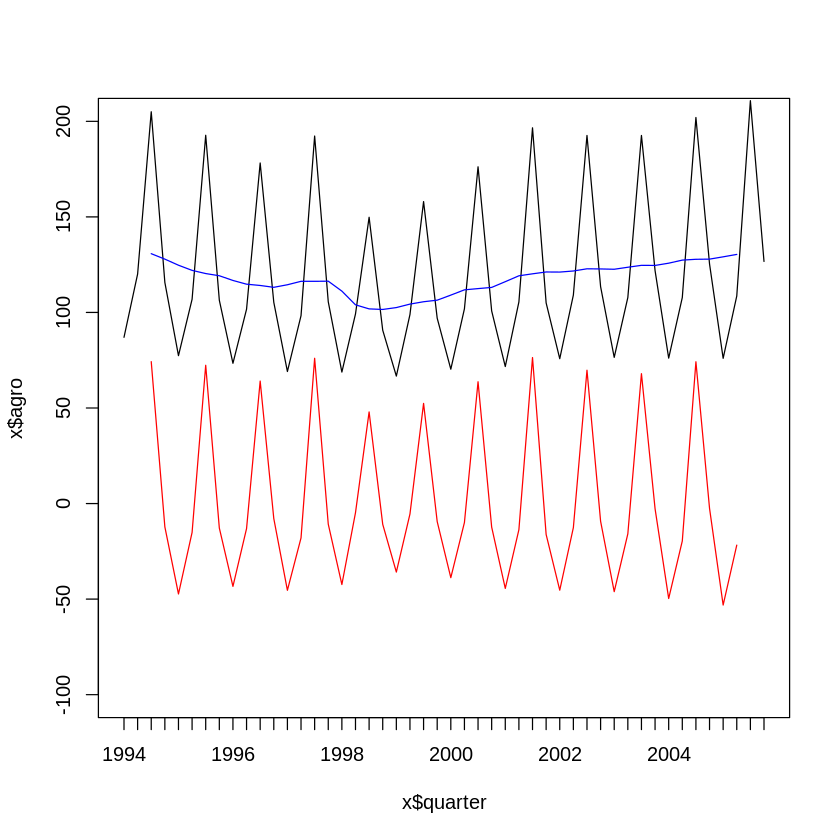

In [72]:
#8 - пример 5.1.2
rm(list=ls())
x = read.csv("f02_data_agro.csv", header = TRUE)

x$l1.agro <- c(NA,x$agro[1:nrow(x)-1])
x$l2.agro <- c(NA,NA,x$agro[2:nrow(x)-2])
x$f1.agro <- c(x$agro[2:nrow(x)], NA)
x$f2.agro <- c(x$agro[3:nrow(x)], NA, NA)

x$sma4centered <- (0.5*x$f2.agro + x$f1.agro + x$agro + x$l1.agro +0.5*x$l2.agro)/4
x$diff <- x$agro - x$sma4centered
x$quarter = as.yearqtr(x$time,format="%YQ%q")


plot(x$agro ~ x$quarter, type = "l", lwd = 1, ylim=c(-100,200))
lines(x$sma4centered ~ x$quarter, col = "blue")
lines(x$diff ~ x$quarter, col = "red")


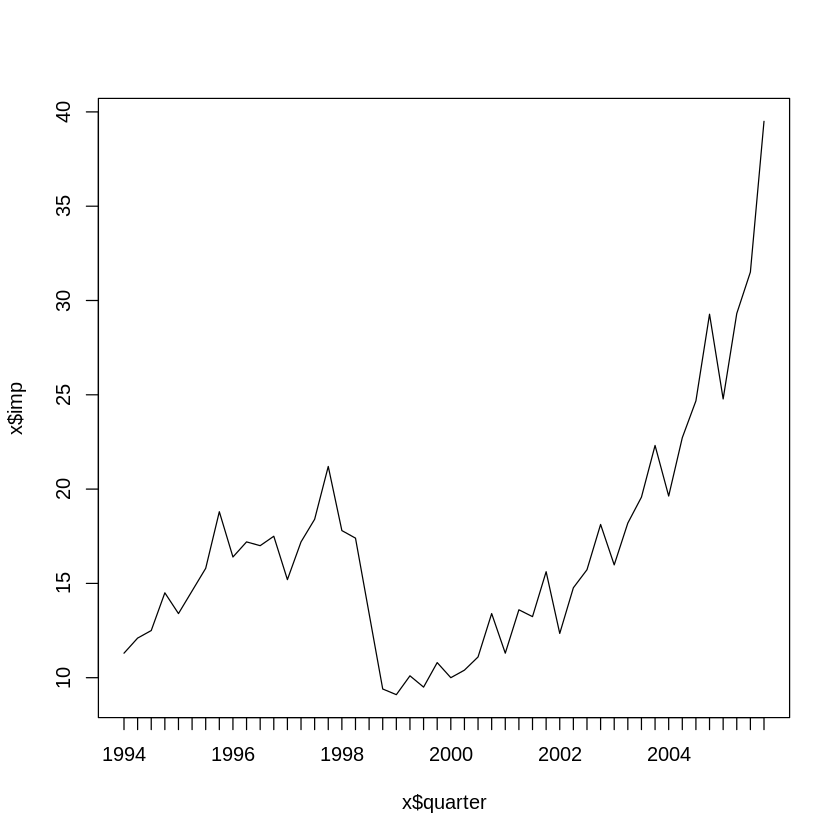

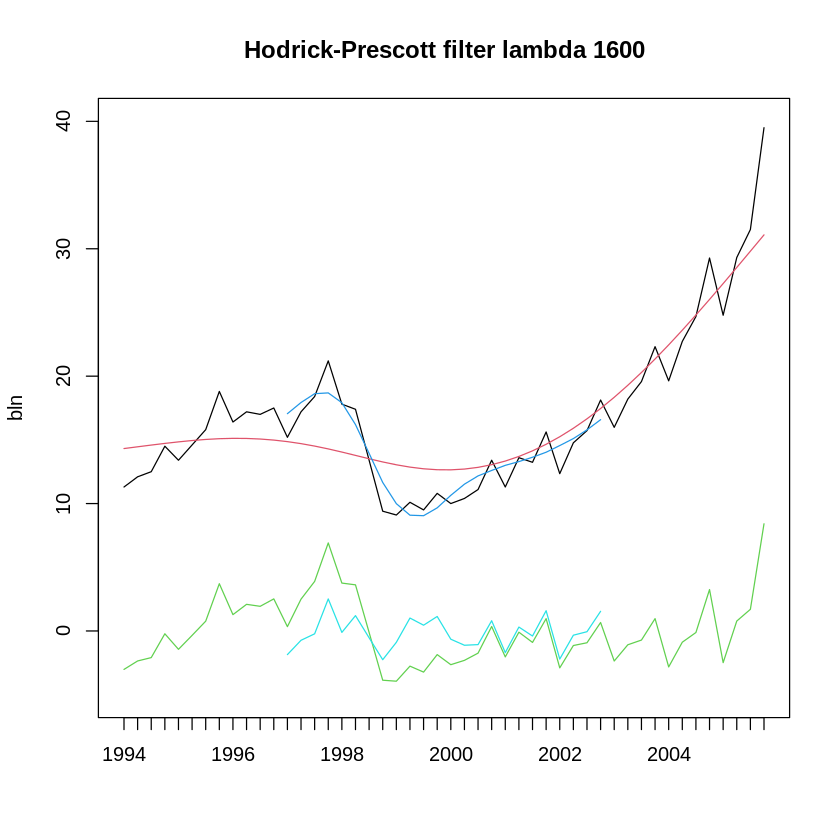

In [73]:
# 9 - пример 5.1.5
rm(list=ls())
x = read.csv("f03_data_imp.csv", header = TRUE)
x$quarter = as.yearqtr(x$time,format="%YQ%q")
plot(x$imp ~ x$quarter, type = "l", lwd = 1)


hpf <- hpfilter(x$imp,freq = 1600)
#x$HPimp <- mFilter(x$imp, filter="HP", freq = 1600)
plot(x$imp ~ x$quarter, type = "l", main="Hodrick-Prescott filter lambda 1600", lwd = 1, ylim=c(-5,40), xlab="", ylab="bln")
lines(hpf$trend~ x$quarter,   col=2)
lines(hpf$cycle~ x$quarter,   col=3)


#impts <- ts(x$imp)
#impts <- mFilter(impts, filter="BK", nfix = 12)
#lines(impts$trend~ x$quarter,   col=4)
# nfix = 3*frex
bkf <- bkfilter(x$imp, nfix = 12)
lines(bkf$trend~ x$quarter,   col=4)
lines(bkf$cycle~ x$quarter,   col=5)



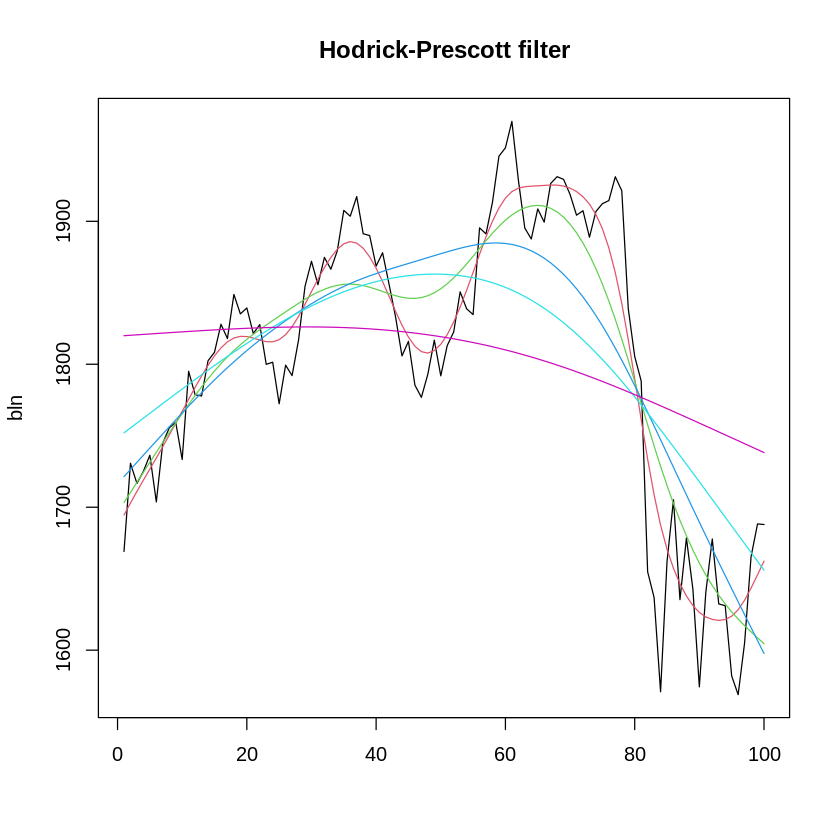

In [74]:
#10  - пример 5.1.6
rm(list=ls())
x <- ts(read.csv("f01_data_ind.csv", header = TRUE))
hpf100 <- hpfilter(x,freq = 100)
hpf1600 <- hpfilter(x,freq = 1600)
hpf14400 <- hpfilter(x,freq = 14400)
hpf100000 <- hpfilter(x,freq = 100000)
hpf1000000 <- hpfilter(x,freq = 1000000)
ts.plot(x, type = "l", main="Hodrick-Prescott filter", lwd = 1, xlab="", ylab="bln")
lines(hpf100$trend,   col=2)
lines(hpf1600$trend,   col=3)
lines(hpf14400$trend,   col=4)
lines(hpf100000$trend,   col=5)
lines(hpf1000000$trend,   col=6)


alpha 
0.9587375

[1] 125499

[1] 0.2

[1] 301702.4

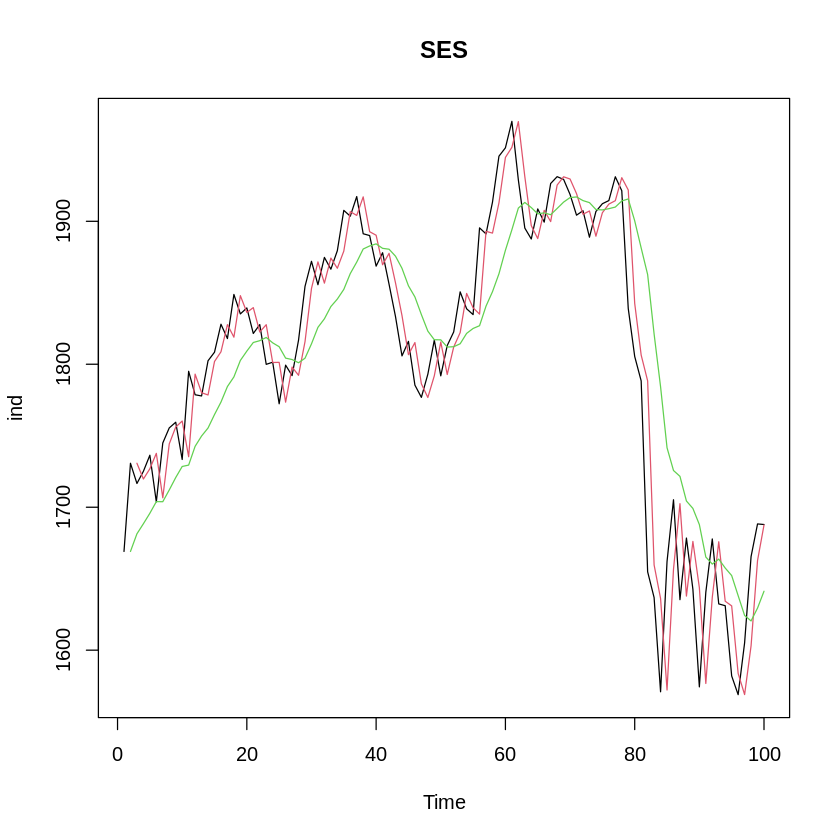

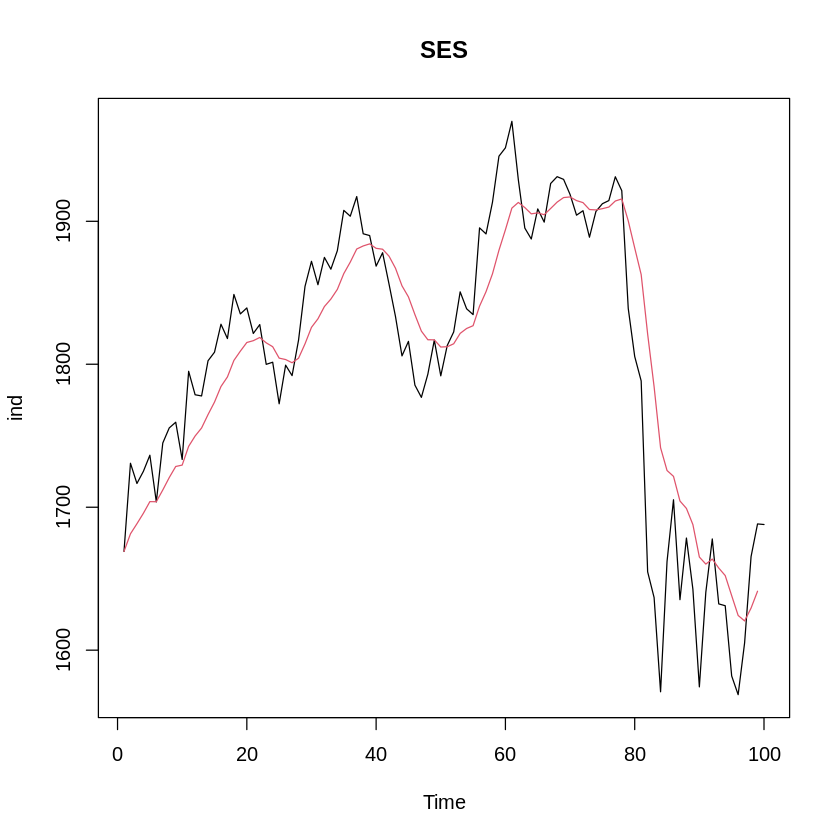

In [75]:
#11 - пример 5.1.7
rm(list=ls())
ind <- ts(read.csv("f01_data_ind.csv", header = TRUE))
ts.plot(ind, type = "l", main="SES", lwd = 1)

ses <- HoltWinters(ind, alpha = NULL, beta = NULL, gamma = FALSE, seasonal = "multiplicative", start.periods = 4)
lines(ses$fitted[,2], col =2)
ses[["alpha"]]
# альфа несколько отличается от расчитанных в книге (в EViews)

ses[["SSE"]]
# и сумма ошибок меньше

ses1 <-ses(ind[1:100], h=2, alpha=NULL, initial="simple")

ses2 <- HoltWinters(ind, alpha = 0.2, beta = FALSE, gamma = FALSE, seasonal = "additive", start.periods = 2)
lines(ses2$fitted[,2], col =3)
ses2[["alpha"]]
ses2[["SSE"]]

ts.plot(ind, type = "l", main="SES", lwd = 1)
lines(lag(ses2$fitted[,2],1), col = 2)